In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import pylab as plt

import portfolioopt as pfopt
from scipy.stats import norm

import seaborn as sns
import os


import sys
sys.path.append('C:\\projects\\finances.git')

from finances.market import market_data as mkt_data

data_path = 'C:\\projects\\finances.git\\finances\\trading\\strategies'

# BTC

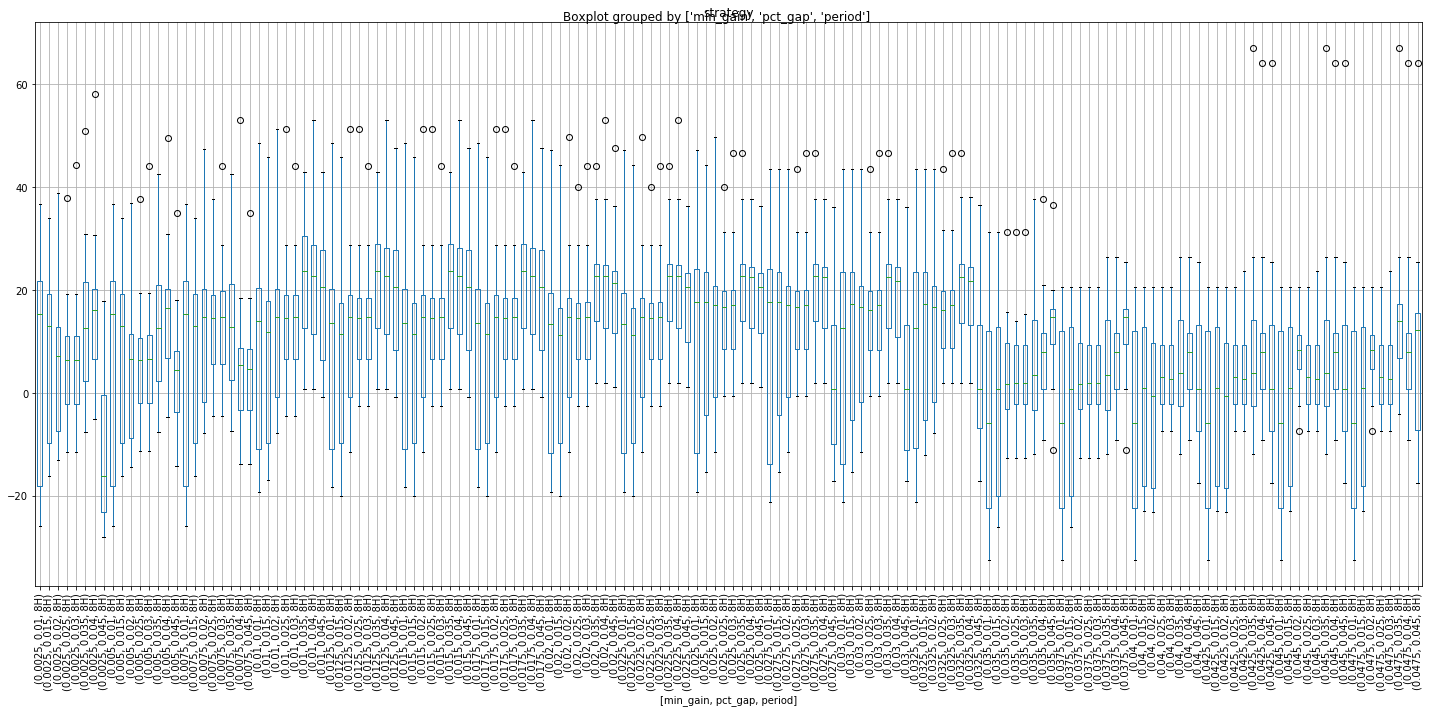

In [3]:
df = pd.read_csv(os.path.join(data_path, 'dynamic_stoploss_strategy_BTC.csv'))

fig, ax = plt.subplots(1,1, figsize=(20,10))

df[df['period']=='8H'].boxplot(
    column='strategy',
    by=['min_gain', 'pct_gap', 'period'],
    rot=90,
    ax=ax)
plt.tight_layout()
plt.show()

In [7]:
def sharpe(data):
    return data.mean()/data.std()

In [8]:
db = df.groupby(['period','min_gain', 'pct_gap']).agg(sharpe)

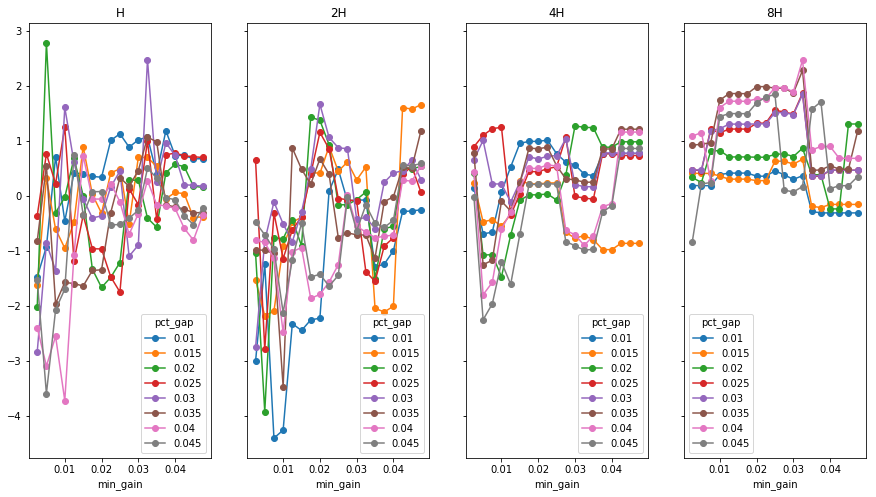

In [9]:
fig, ax = plt.subplots(1,4, figsize=(15,8), sharey=True)
for n, period in enumerate(['H', '2H', '4H', '8H']):
    b = db.unstack(['period', 'pct_gap'])
    b['strategy'][period].plot(style='o-', ax=ax[n])
    ax[n].set_title(period)

### Best performance:
* Period: 8H
* Pct Gap: 0.035
* Min gain: 0.025


# ETH

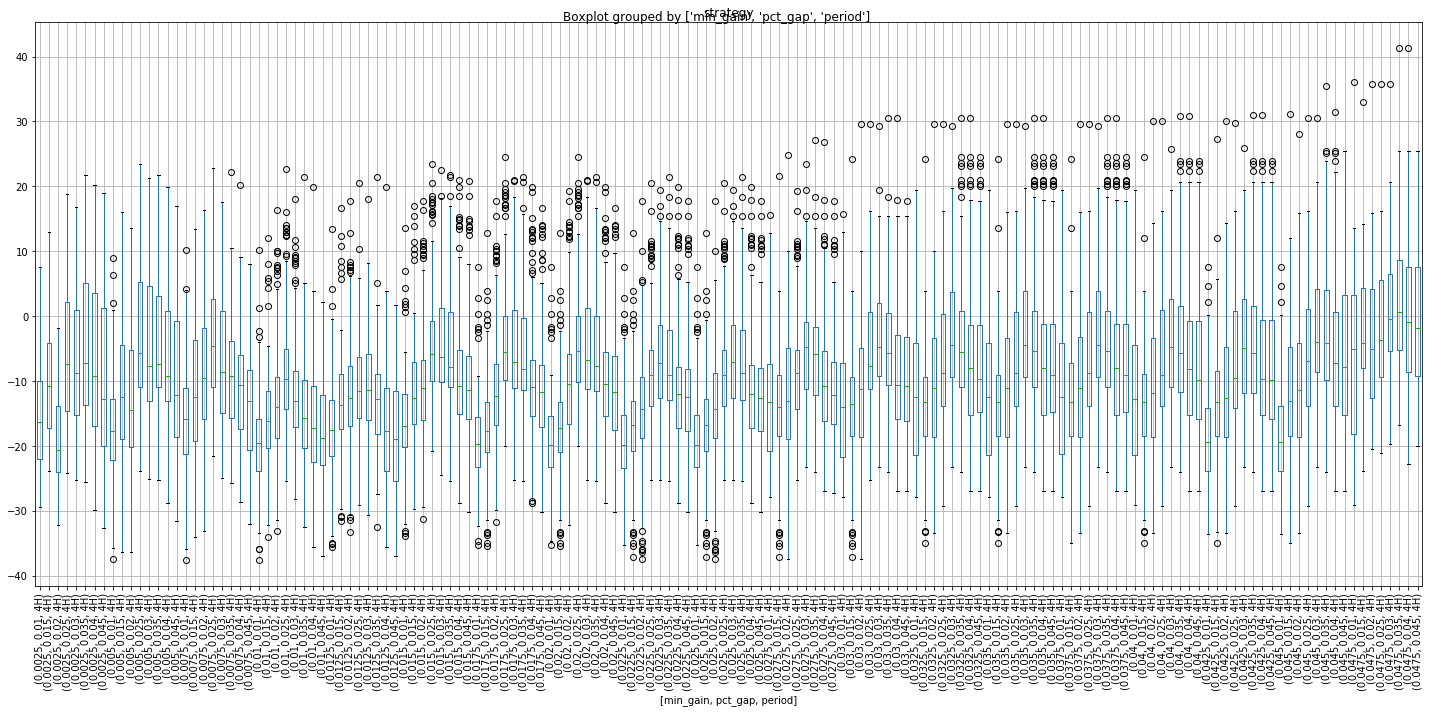

In [14]:
df = pd.read_csv(os.path.join(data_path, 'dynamic_stoploss_strategy_ETH.csv'))

fig, ax = plt.subplots(1,1, figsize=(20,10))

df[df['period']=='4H'].boxplot(
    column='strategy',
    by=['min_gain', 'pct_gap', 'period'],
    rot=90,
    ax=ax)
plt.tight_layout()
plt.show()

In [11]:
db = df.groupby(['period','min_gain', 'pct_gap']).agg(sharpe)

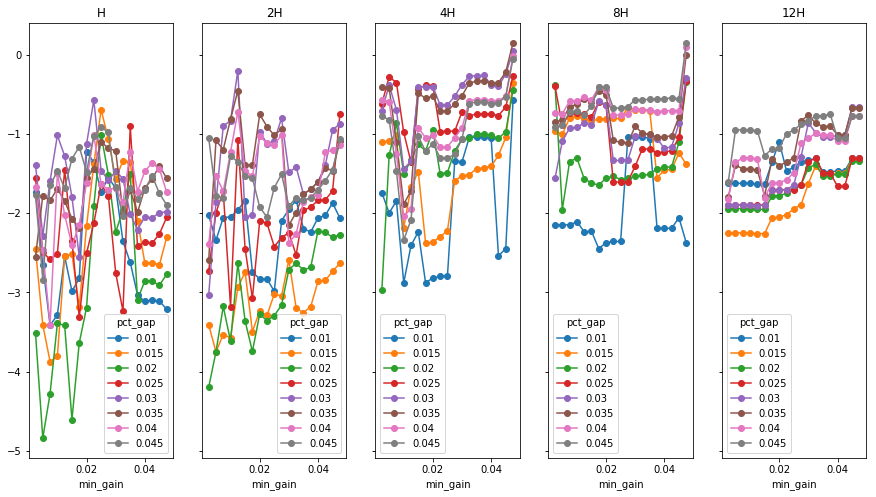

In [13]:
fig, ax = plt.subplots(1,5, figsize=(15,8), sharey=True)
for n, period in enumerate(['H', '2H', '4H', '8H', '12H']):
    b = db.unstack(['period', 'pct_gap'])
    b['strategy'][period].plot(style='o-', ax=ax[n])
    ax[n].set_title(period)

#### Best performance:
* Period: 4H
* pct_gap = 0.035
* minimum gain = 0.0475